In [1]:
# Library

import numpy as np
import pandas as pd
import keras
import csv
import matplotlib.pyplot as plt
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, Embedding
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.utils import to_categorical
from sklearn.metrics import f1_score, roc_auc_score, recall_score, confusion_matrix
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
# Read sample from Dataset

with open('fixed_sequences_length_9_PELM/Group_Phos_S_pos.fasta', 'r') as f:
    PELM_s_positif_txt = f.readlines()
with open('fixed_sequences_length_9_PELM/Group_Phos_T_pos.fasta', 'r') as f:
    PELM_t_positif_txt = f.readlines()
with open('fixed_sequences_length_9_PELM/Group_Phos_Y_pos.fasta', 'r') as f:
    PELM_y_positif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/S_IDS_pos.fasta', 'r') as f:
    PPA_s_positif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/T_IDS_pos.fasta', 'r') as f:
    PPA_t_positif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/Y_IDS_pos.fasta', 'r') as f:
    PPA_y_positif_txt = f.readlines()

with open('fixed_sequences_length_9_PELM/Group_Phos_S_neg.fasta', 'r') as f:
    PELM_s_negatif_txt = f.readlines()
with open('fixed_sequences_length_9_PELM/Group_Phos_T_neg.fasta', 'r') as f:
    PELM_t_negatif_txt = f.readlines()
with open('fixed_sequences_length_9_PELM/Group_Phos_Y_neg.fasta', 'r') as f:
    PELM_y_negatif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/S_IDS_neg.fasta', 'r') as f:
    PPA_s_negatif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/T_IDS_neg.fasta', 'r') as f:
    PPA_t_negatif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/Y_IDS_neg.fasta', 'r') as f:
    PPA_y_negatif_txt = f.readlines()

# Pick the window 9

PELM_s_positif = np.array([])
for i in range(1,len(PELM_s_positif_txt),2):
    temp = PELM_s_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_s_positif = np.append(PELM_s_positif, temp2)
print('PELM Dataset, S positive shape: ', PELM_s_positif.reshape(int(len(PELM_s_positif)/9),9).shape)

PELM_t_positif = np.array([])
for i in range(1,len(PELM_t_positif_txt),2):
    temp = PELM_t_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_t_positif = np.append(PELM_t_positif, temp2)
print('PELM Dataset, T positive shape: ', PELM_t_positif.reshape(int(len(PELM_t_positif)/9),9).shape)
    
PELM_y_positif = np.array([])
for i in range(1,len(PELM_y_positif_txt),2):
    temp = PELM_y_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_y_positif = np.append(PELM_y_positif, temp2)
print('PELM Dataset, Y positive shape: ', PELM_y_positif.reshape(int(len(PELM_y_positif)/9),9).shape)

PPA_s_positif = np.array([])
for i in range(1,len(PPA_s_positif_txt),2):
    temp = PPA_s_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_s_positif = np.append(PPA_s_positif, temp2)
print('PPA Dataset, S positive shape: ', PPA_s_positif.reshape(int(len(PPA_s_positif)/9),9).shape)

PPA_t_positif = np.array([])
for i in range(1,len(PPA_t_positif_txt),2):
    temp = PPA_t_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_t_positif = np.append(PPA_t_positif, temp2)
print('PPA Dataset, T positive shape: ', PPA_t_positif.reshape(int(len(PPA_t_positif)/9),9).shape)
    
PPA_y_positif = np.array([])
for i in range(1,len(PPA_y_positif_txt),2):
    temp = PPA_y_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_y_positif = np.append(PPA_y_positif, temp2)
print('PPA Dataset, Y positive shape: ', PPA_y_positif.reshape(int(len(PPA_y_positif)/9),9).shape)

print()

PELM_s_negatif = np.array([])
for i in range(1,len(PELM_s_negatif_txt),2):
    temp = PELM_s_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_s_negatif = np.append(PELM_s_negatif, temp2)
print('PELM Dataset, S negative shape: ', PELM_s_negatif.reshape(int(len(PELM_s_negatif)/9),9).shape)

PELM_t_negatif = np.array([])
for i in range(1,len(PELM_t_negatif_txt),2):
    temp = PELM_t_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_t_negatif = np.append(PELM_t_negatif, temp2)
print('PELM Dataset, T negative shape: ', PELM_t_negatif.reshape(int(len(PELM_t_negatif)/9),9).shape)
    
PELM_y_negatif = np.array([])
for i in range(1,len(PELM_y_negatif_txt),2):
    temp = PELM_y_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_y_negatif = np.append(PELM_y_negatif, temp2)
print('PELM Dataset, Y negative shape: ', PELM_y_negatif.reshape(int(len(PELM_y_negatif)/9),9).shape)

PPA_s_negatif = np.array([])
for i in range(1,len(PPA_s_negatif_txt),2):
    temp = PPA_s_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_s_negatif = np.append(PPA_s_negatif, temp2)
print('PPA Dataset, S negative shape: ', PPA_s_negatif.reshape(int(len(PPA_s_negatif)/9),9).shape)

PPA_t_negatif = np.array([])
for i in range(1,len(PPA_t_negatif_txt),2):
    temp = PPA_t_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_t_negatif = np.append(PPA_t_negatif, temp2)
print('PPA Dataset, T negative shape: ', PPA_t_negatif.reshape(int(len(PPA_t_negatif)/9),9).shape)
    
PPA_y_negatif = np.array([])
for i in range(1,len(PPA_y_negatif_txt),2):
    temp = PPA_y_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_y_negatif = np.append(PPA_y_negatif, temp2)
print('PPA Dataset, Y negative shape: ', PPA_y_negatif.reshape(int(len(PPA_y_negatif)/9),9).shape)


PELM Dataset, S positive shape:  (1554, 9)
PELM Dataset, T positive shape:  (707, 9)
PELM Dataset, Y positive shape:  (267, 9)
PPA Dataset, S positive shape:  (307, 9)
PPA Dataset, T positive shape:  (68, 9)
PPA Dataset, Y positive shape:  (51, 9)

PELM Dataset, S negative shape:  (1543, 9)
PELM Dataset, T negative shape:  (453, 9)
PELM Dataset, Y negative shape:  (226, 9)
PPA Dataset, S negative shape:  (307, 9)
PPA Dataset, T negative shape:  (68, 9)
PPA Dataset, Y negative shape:  (51, 9)


In [3]:
# Choose Dataset to train, make sure correspond with negative dataset

dataset_pos = PPA_y_positif
dataset_neg = PPA_y_negatif
string_name = 'PPA_y'

# Expand dimension, Reshape and Create Label

sequenceLP = int(len(dataset_pos)/9)
dataset_pos = np.expand_dims(dataset_pos, axis=0)
dataset_pos = dataset_pos.reshape(sequenceLP,9)
label_pos = np.ones((sequenceLP,), dtype=int)
label_pos = np.expand_dims(label_pos, axis=0)
label_pos = label_pos.reshape(sequenceLP,1)

sequenceLN = int(len(dataset_neg)/9)
dataset_neg = np.expand_dims(dataset_neg, axis=0)
dataset_neg = dataset_neg.reshape(sequenceLN,9)
label_neg = np.zeros((sequenceLN,), dtype=int)
label_neg = np.expand_dims(label_neg, axis=0)
label_neg = label_neg.reshape(sequenceLN,1)

# Validate

print('Positive Dataset shape: ', dataset_pos.shape)
print('Positive Label shape: ', label_pos.shape)
print('Negative Dataset shape: ', dataset_neg.shape)
print('Negative Label shape: ', label_neg.shape)


Positive Dataset shape:  (51, 9)
Positive Label shape:  (51, 1)
Negative Dataset shape:  (51, 9)
Negative Label shape:  (51, 1)


In [4]:
# Dataset preparation

dataset_X = np.concatenate((dataset_pos, dataset_neg), axis=0, out=None)
dataset_Y = np.concatenate((label_pos, label_neg), axis=0, out=None)

# Tokenizing, Unique character got its own number

asam = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(asam)
dataset_X_token = []
for i in range(len(dataset_X)):
    temp = tokenizer.texts_to_sequences(dataset_X[i])
    dataset_X_token = np.append(dataset_X_token, temp)

dataset_X_token = dataset_X_token-1
dataset_X_token = dataset_X_token.reshape(len(dataset_X),9)

# Onehot

dataset_X_token_onehot = to_categorical(dataset_X_token)
dataset_X_token_onehot = np.expand_dims(dataset_X_token_onehot, axis=3)
dataset_X_token_onehot = dataset_X_token_onehot.reshape(len(dataset_X),9,20,1)

dataset_Y_onehot = to_categorical(dataset_Y)

# Spliting Dataset

validation_size = 0.2
randomS = 13
train_X, valid_X, train_Y, valid_Y = train_test_split(dataset_X_token, dataset_Y_onehot, 
                                                      test_size=validation_size, random_state=randomS)

# Validation

print('Training sample shape: ', train_X.shape)
print('Training label shape: ', train_Y.shape)
print('Validation sample shape: ', valid_X.shape)
print('Validation label shape: ', valid_Y.shape)


Training sample shape:  (81, 9)
Training label shape:  (81, 2)
Validation sample shape:  (21, 9)
Validation label shape:  (21, 2)


In [5]:
# Neural Network Modeling

epochs = 100

model = Sequential()
model.add(Embedding(20, 4, input_length=9))
model.add(Flatten(data_format=None))
model.add(Dense(128, activation='elu', kernel_initializer='he_uniform'))
model.add(Dropout(0.7, noise_shape=None, seed=None))
model.add(Dense(128, activation='elu', kernel_initializer='he_uniform'))
model.add(Dropout(0.7, noise_shape=None, seed=None))
model.add(Dense(128, activation='elu', kernel_initializer='he_uniform'))
model.add(Dropout(0.7, noise_shape=None, seed=None))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

checkpoint = ModelCheckpoint('weight_best.hdf5', monitor='val_loss', verbose=0, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)
callback_list = [checkpoint]

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 9, 4)              80        
_________________________________________________________________
flatten_1 (Flatten)          (None, 36)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4736      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
__________

In [6]:
# Train The Model

model_train = model.fit(train_X, train_Y, epochs=epochs, batch_size=32, 
                        validation_data=(valid_X, valid_Y), callbacks=callback_list)

Train on 81 samples, validate on 21 samples
Epoch 1/100
81/81 [==============================] - 0s 4ms/step - loss: 0.7492 - acc: 0.5062 - val_loss: 0.6809 - val_acc: 0.5714
Epoch 2/100
81/81 [==============================] - 0s 73us/step - loss: 0.7038 - acc: 0.6296 - val_loss: 0.6790 - val_acc: 0.5238
Epoch 3/100
81/81 [==============================] - 0s 74us/step - loss: 0.7766 - acc: 0.4691 - val_loss: 0.6781 - val_acc: 0.6190
Epoch 4/100
81/81 [==============================] - 0s 69us/step - loss: 0.7903 - acc: 0.4074 - val_loss: 0.6788 - val_acc: 0.5714
Epoch 5/100
81/81 [==============================] - 0s 74us/step - loss: 0.6791 - acc: 0.5802 - val_loss: 0.6784 - val_acc: 0.5238
Epoch 6/100
81/81 [==============================] - 0s 81us/step - loss: 0.7792 - acc: 0.5309 - val_loss: 0.6772 - val_acc: 0.5714
Epoch 7/100
81/81 [==============================] - 0s 86us/step - loss: 0.8750 - acc: 0.4444 - val_loss: 0.6758 - val_acc: 0.5714
Epoch 8/100
81/81 [==============

81/81 [==============================] - 0s 75us/step - loss: 0.3702 - acc: 0.8025 - val_loss: 0.7563 - val_acc: 0.6190
Epoch 63/100
81/81 [==============================] - 0s 76us/step - loss: 0.3583 - acc: 0.8148 - val_loss: 0.7590 - val_acc: 0.6190
Epoch 64/100
81/81 [==============================] - 0s 76us/step - loss: 0.4021 - acc: 0.8148 - val_loss: 0.7648 - val_acc: 0.7143
Epoch 65/100
81/81 [==============================] - 0s 77us/step - loss: 0.4418 - acc: 0.7778 - val_loss: 0.7742 - val_acc: 0.7143
Epoch 66/100
81/81 [==============================] - 0s 64us/step - loss: 0.3369 - acc: 0.8272 - val_loss: 0.7760 - val_acc: 0.7143
Epoch 67/100
81/81 [==============================] - 0s 69us/step - loss: 0.3157 - acc: 0.8519 - val_loss: 0.7781 - val_acc: 0.6667
Epoch 68/100
81/81 [==============================] - 0s 67us/step - loss: 0.3368 - acc: 0.8272 - val_loss: 0.7899 - val_acc: 0.6667
Epoch 69/100
81/81 [==============================] - 0s 80us/step - loss: 0.3238 

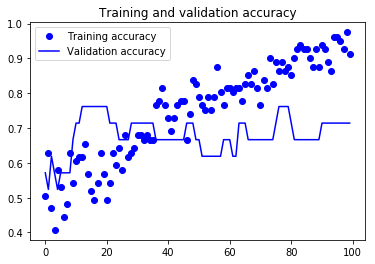

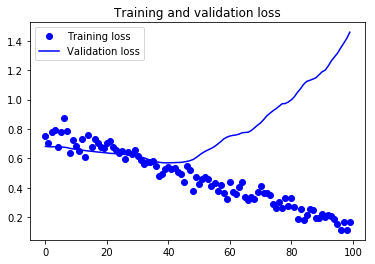

In [7]:
# Plot The Training Accuracy

accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('results/Acc_result_{}.png'.format(string_name))
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('results/Loss_result_{}.png'.format(string_name))
plt.show()

In [8]:
# Model Score Summary

model.load_weights("weight_best.hdf5")
y_pred = np.argmax(model.predict(valid_X), axis=1)
y_true = np.argmax(valid_Y, axis = 1)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
f1 = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
auc = roc_auc_score(y_true, y_pred, average='macro', sample_weight=None, max_fpr=None)
sensi = tp/(tp+fn)
specificity = tn/(tn+fp)
accu = (tn + tp)/(tn + tp + fn + fp)
mcc = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))

print('{} Result'.format(string_name))
print('Accuracy :', accu)
print('AUC :', auc)
print('F1 :', f1)
print('Sensitivity :', sensi)
print('Specificity :', specificity)
print('MCC :', mcc)

with open('results/summary_{}.csv'.format(string_name), mode='w') as summary_file:
    employee_writer = csv.writer(summary_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    employee_writer.writerow(['Accuracy :', accu])
    employee_writer.writerow(['AUC :', auc])
    employee_writer.writerow(['F1 :', f1])
    employee_writer.writerow(['Sensitivity :', sensi])
    employee_writer.writerow(['Specificity :', specificity])
    employee_writer.writerow(['MCC :', mcc])
    
    employee_writer.writerow([''])
    
    employee_writer.writerow(['TP :', tp])
    employee_writer.writerow(['FP :', fp])
    employee_writer.writerow(['TN :', tn])
    employee_writer.writerow(['FN :', fn])
    

PPA_y Result
Accuracy : 0.6666666666666666
AUC : 0.638888888888889
F1 : 0.7407407407407408
Sensitivity : 0.8333333333333334
Specificity : 0.4444444444444444
MCC : 0.3042903097250923
